# 导入库
使用`numpy, pandas`和`sk-learn`来进行机器学习，使用`matplotlib`和`seaborn`进行可视化。

In [2]:
# 对数据进行清理的库 pandas and numpy
import pandas as pd
import numpy as np

# 警告控制
import warnings

In [3]:
# 关闭警告值
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

### 项目来源
**项目来源于AMAN CHAUHAN于2022年10月发布在kaggle网站上的数据集，点击[此处](https://www.kaggle.com/datasets/whenamancodes/student-performance)快速跳转至kaggle页面**

### 项目目标
* 使用某地区的两所葡萄牙语学校提供的数据（包括学生的家庭背景和三次考试成绩的数据），利用学生的家庭背景及其前两次考试成绩的数据，对其第三次考试成绩进行预测。

### 项目介绍：
这是一个**监督学习的回归机器学习任务**：给定一组带有不同家庭背景的学生及其成绩的数据，我们希望训练一个可以学习将特征（也称为解释变量）映射到目标的模型。

关于数据集：
>This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

* **监督学习问题**： 我们可以知道数据的特征和目标，我们的目标是训练可以学习两者之间映射关系的模型。
* **回归问题**： G3学期末得分是一个连续的变量。

在训练中，我们希望模型能够学习特征和分数之间的关系，因此我们给出了特征和答案。然后，为了测试模型的学习效果，我们在一个从未见过答案的测试集上进行评估

In [4]:
# 可视化工具包
import matplotlib.pyplot as plt
%matplotlib inline

# 设置默认字体大小
plt.rcParams['font.size'] = 24

# 导入设置图片大小的工具
from IPython.core.pylabtools import figsize

# 导入用于可视化的seaborn
import seaborn as sns
sns.set(font_scale = 2)

# 导入用于划分训练集和测试集的工具
from sklearn.model_selection import train_test_split

# 1. 数据清理和格式化

## 1.1 加载并检查数据

把数据加载到pandas的dataframe中，并显示。

In [5]:
# 加载数据到pandas dataframe
data = pd.read_csv('data/Maths.csv')

# 显示前五行数据
data.head().style.background_gradient(cmap="Pastel1")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


**理解数据：**
根据AMAN CHAUHAN在[kaggle](https://www.kaggle.com/datasets/whenamancodes/student-performance)上对他数据的解释，我们可以得知数据表头的含义。

其中，最重要的是列尾的3列元素：G1, G2, G3. 他们的含义为：
|Grade|Description|
|:-----:|:-----------:|
|G1|first period grade (numeric: from 0 to 20)|
|G2|second period grade (numeric: from 0 to 20)|
|G3|final grade (numeric: from 0 to 20, output target)|


而根据AMAN CHAUHAN的解释，该数据集他**已经**进行过去掉缺失值的处理，因此我们只需要对数据类型进行转换而不需要对缺失值处理。当然，我们可以使用`dataframe.info()`方法来查看列数据类型

## 1.2 数据类型和缺失值

`dataframe.info`方法是一种通过显示每列的**数据类型**和**非缺失值的数量**来评估数据的快速方法。从查看数据帧开始，可能存在问题，因为缺失值被编码为`Not Available`而不是`np.nan`（不是数字）。这意味着带有数字的列将不会表示为数字，因为**pandas会将具有任何字符串值的列转换为所有字符串的列**。

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

而一些明确是布尔值（如schoolsup）的列被储存为object类型，因此我们要将其转换为正确的int类型，**no $\rightarrow$ 0, yes $\rightarrow$ 1.**

### 1.2.1 将数据转换为正确类型
- 首先将**yes or no转换为1 or 0**
- 然后将这些列转换为**数字`int`**数据类型: 

In [7]:
# 将yes or no转换为1 or 0
data = data.replace({"yes": 1})
data = data.replace({"no": 0})


# 将这些列转换为int类型.
for col in list(data.columns):
    if ("schoolsup" in col or "famsup" in col 
        or "paid" in col or "activities" in col or "nursery" in col 
        or "higher" in col or "internet" in col or "romantic" in col):
        # 将数据类型转换为int
        data[col] = data[col].astype(int)

In [8]:
# 数据data的描述性统计信息
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


`data.describe()`作用是生成描述性统计数据，查看数据集分布的集中趋势，分散和形状，不包括NaN值。

对于数字数据，则结果将包括count， mean，std，min，max以及第25，第50和第75百分位数,其中第50百分位数等价于中位数

In [9]:
# 显示前5行
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# 2.探索性数据分析

[探索性数据分析（EDA）](https://en.wikipedia.org/wiki/Exploratory_data_analysis)是一个开放式流程，我们制作绘图并计算统计数据，以便探索我们的数据。 

- 目的是找到异常，模式，趋势或关系。这些可能是有趣的（例如，找到两个变量之间的相关性），或者它们可用于建模决策，例如使用哪些特征。 
- 简而言之，EDA的目标是确定我们的数据可以告诉我们什么！ EDA通常以高级概述(high-level overview)开始，然后在我们找到要检查的感兴趣的区域时缩小到数据集的特定部分。

要开始EDA，我们将专注于单一变量，**G3**，因为这是我们的机器学习模型的目标。开始探索此值。

## 2.1 单变量图

单个变量（称为[单变量](https://en.wikipedia.org/wiki/Univariate)统计）图表显示单个变量的分布，如直方图。

目标是预测G3，因此合理的开始是**检查此变量的分布**。直方图是可视化单个变量分布的简单而有效的方法，使用`matplotlib`可以很容易的画出直方图。

Text(0.5, 1.0, 'Student Score Distribution')

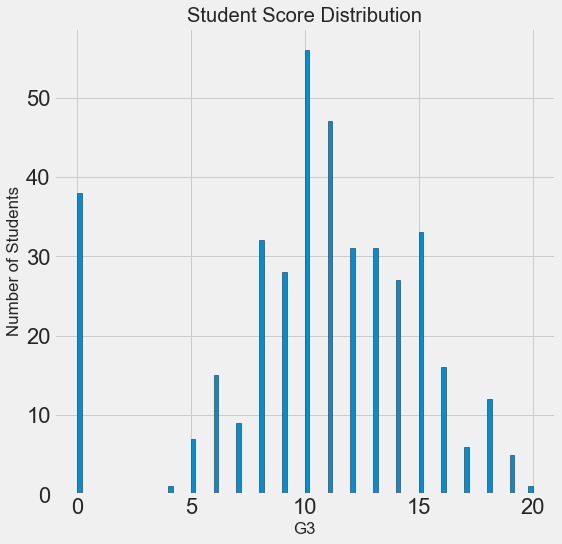

In [10]:
figsize(8, 8)

# 绘制直方图
plt.style.use('fivethirtyeight')
plt.hist(data['G3'].dropna(), bins=100, edgecolor='k')

# x,y坐标轴标签
plt.xlabel("G3")
plt.ylabel("Number of Students")
# 图标名称
plt.title("Student Score Distribution")

由于学生的期末得分是满分20分制，我们预计会看到应该是符合正态分布的图像。但是，某些学生因为某些原因导致出现了0分现象，因此我们在0分处出现了大量的异常值。

因此，我们需要在统计中去除这些异常值，避免对我们后续机器回归学习的结果造成影响。

In [11]:
# 查看学生成绩分布的描述性统计数据
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [12]:
# 取出最低分的所有同学，并显示详情
data.loc[data["G3"] == 0, :]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0


异常值的产生原因有：
- 学生因故未能参加期末考试导致G3得分为0
- 数据录入错误

这些异常值可以被抛弃。

## 2.2 去除异常值

当我们删除异常值时，我们需要小心，我们不会因为它们看起来很奇怪就丢掉测量值。但根据上面的描述，大部分学生G1,G2都有分数的情况下，G3却没有分数。因此，我们采取直接去除所有G3为0分的数据。

In [13]:
# 去除异常值
data = data[(data['G3'] != 0)]

Text(0.5, 1.0, 'Student Score Distribution')

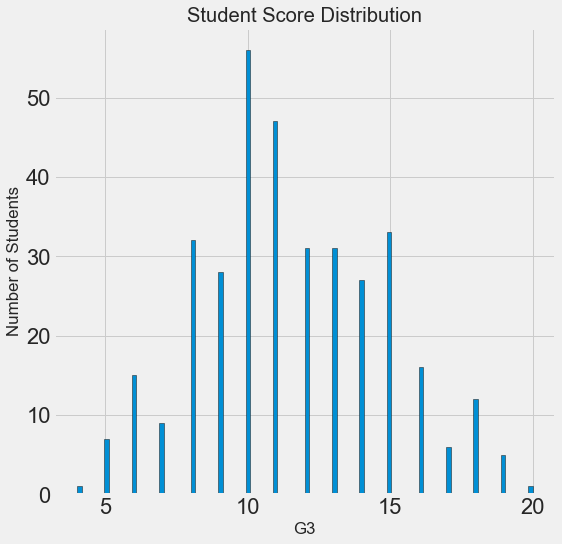

In [14]:
figsize(8, 8)

# 绘制学生G3分数直方图
plt.style.use('fivethirtyeight')
plt.hist(data['G3'].dropna(), bins=100, edgecolor='k')

# x,y坐标轴标签
plt.xlabel("G3")
plt.ylabel("Number of Students")
# 图标名称
plt.title("Student Score Distribution")

这幅图像就正常很多，并且接近正态分布，但中心偏左侧。

虽然单凭借`G3`这一期末总分来衡量学生的成绩是不合适的，但是为了问题研究的方便，我们还是选择来预测G3的值。在实际生活问题的研究中，应该同时研究`G1,G2`和`G3`这三者应该会更加贴合实际情况。

## 2.3 寻找关系

为了查看**分类变量 - Mjob和Fjob**对学生G3分数的影响，我们使用**分类变量**的值来绘制**密度图**。

In [15]:
# 创建一个分数列表，对母亲工作类型及其数量进行统计
types_M = data.dropna(subset=['G3'])
Alltypes_M_num = types_M['Mjob'].value_counts()

**查看所有母亲工作类型及其数量**

In [16]:
print(Alltypes_M_num)

other       127
services     94
teacher      54
at_home      50
health       32
Name: Mjob, dtype: int64


把这些所有的观测值提取出来，再进行绘图。

In [17]:
types_M = list(Alltypes_M_num.index)
print(types_M)

['other', 'services', 'teacher', 'at_home', 'health']


Text(0.5, 1.0, 'Density Plot of G3 Scores by Mother Job Type')

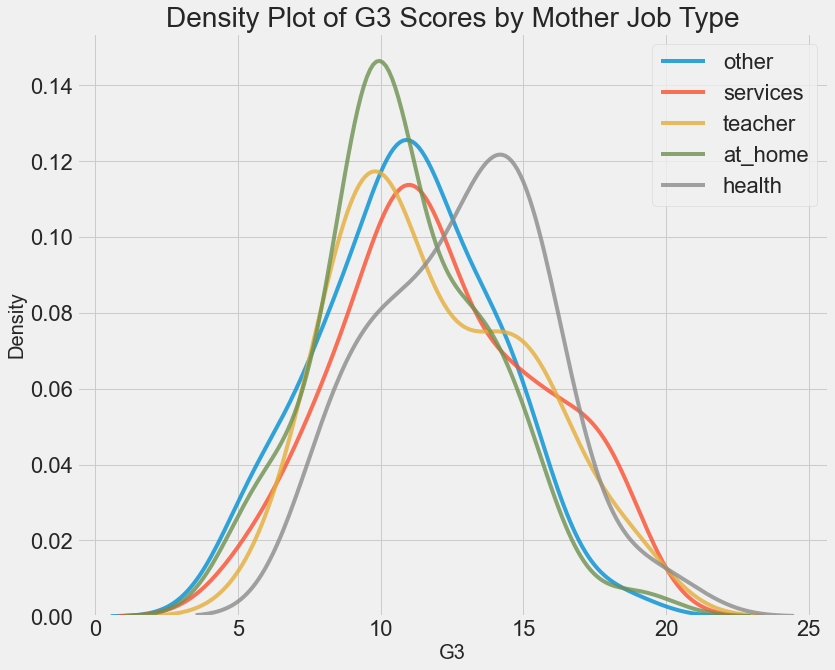

In [18]:
# 母亲工作类别G3分数分布图
figsize(12, 10)

# 绘制每种类型
for b_type in types_M:
    # 选择工作类型
    subset = data[data['Mjob'] == b_type]

    # G3分数的密度图
    sns.kdeplot(subset['G3'].dropna(), label=b_type, shade=False, alpha=0.8)

plt.xlabel('G3', size=20)
plt.ylabel('Density', size=20)
plt.legend()
plt.title('Density Plot of G3 Scores by Mother Job Type', size=28)

这时候，我们再去看看父亲的工作对学生G3分数的影响。

In [19]:
# 创建一个分数列表，对母亲工作类型及其数量进行统计
types_F = data.dropna(subset=['G3'])
Alltypes_F_num = types_F['Fjob'].value_counts()

# 查看所有父亲工作类型及其数量
print(Alltypes_F_num)

other       196
services    100
teacher      26
health       18
at_home      17
Name: Fjob, dtype: int64


显然，结论是和母亲是类似的。

In [20]:
types_F = list(Alltypes_F_num.index)
print(types_F)

['other', 'services', 'teacher', 'health', 'at_home']


Text(0.5, 1.0, 'Density Plot of G3 Scores by Father Job Type')

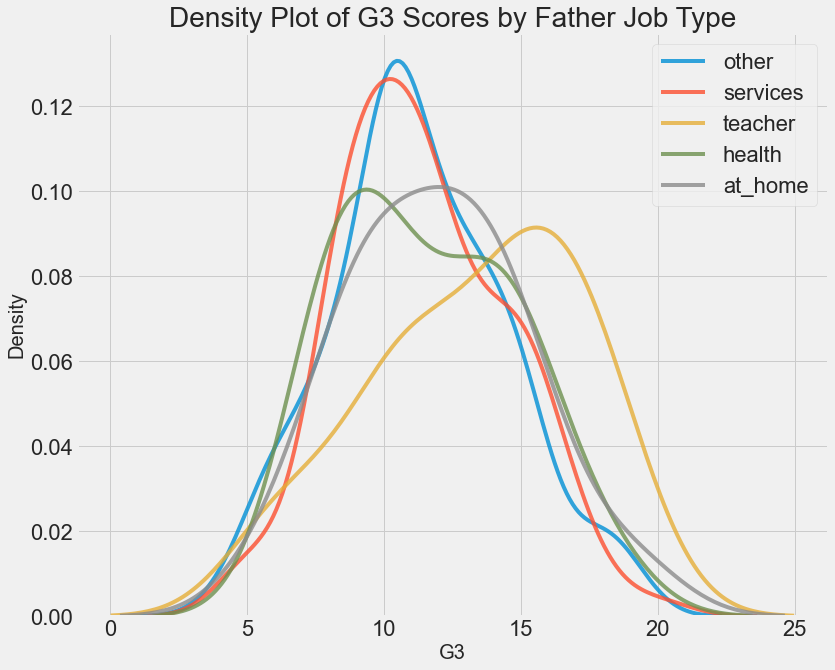

In [21]:
# 父亲工作类别G3分数分布图
figsize(12, 10)

# 绘制每种类型
for b_type in types_F:
    # 选择工作类型
    subset = data[data['Fjob'] == b_type]

    # G3分数的密度图
    sns.kdeplot(subset['G3'].dropna(), label=b_type, shade=False, alpha=0.8)

plt.xlabel('G3', size=20)
plt.ylabel('Density', size=20)
plt.legend()
plt.title('Density Plot of G3 Scores by Father Job Type', size=28)

很显然，父亲和母亲的工作类型并不会对学生G3分数分布上产生显著差异。尽管如此，将父亲和母亲的工作类型纳入分类变量可能是有意义的。

# 3.特征工程
## 3.1特征工程的选择

In [22]:
# 带有特征值的变量
catagorical_features = [features for features in data.columns if data[features].dtype == object]

# 看特征值的数量
print(len(catagorical_features))

# 输出这些变量
data[catagorical_features].head()

9


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian
0,GP,F,U,GT3,A,at_home,teacher,course,mother
1,GP,F,U,GT3,T,at_home,other,course,father
2,GP,F,U,LE3,T,at_home,other,other,mother
3,GP,F,U,GT3,T,health,services,home,mother
4,GP,F,U,GT3,T,other,other,home,father


接下来，我们需要对这些进行特征抽取映射.

In [23]:
# 特征抽取映射
for feature in catagorical_features:
    # 根据类型的不同先行聚类
    labels_index = data.groupby([feature])['G3'].mean().sort_values().index

    # 利用枚举器从0开始分类赋值
    labels_ordered = {k: i for i,k in enumerate(labels_index, 0)}
    data[feature] = data[feature].map(labels_ordered)

# 打印前10行
data[catagorical_features].head(10)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian
0,1,0,1,0,1,0,4,0,1
1,1,0,1,0,0,0,0,0,2
2,1,0,1,1,0,0,0,1,1
3,1,0,1,0,0,4,1,2,1
4,1,0,1,0,0,1,0,2,2
5,1,1,1,1,0,3,0,3,1
6,1,1,1,1,0,1,0,2,1
7,1,0,1,0,1,1,4,2,1
8,1,1,1,1,1,3,0,2,1
9,1,1,1,0,0,1,0,2,1


## 3.2 划分训练集和测试集
对于这个问题，我们可以直接将整个G3分数不为0的数据集拆分为**30%的测试集**和**70%的训练集**

使用scikit-learn将数据拆分为随机训练和测试集很简单。 我们可以设置拆分的 `random state`以确保一致的结果。

In [24]:
# 将特征和目标分离开
features = data.drop(columns="G3")
no_score = features
targets = pd.DataFrame(data['G3'])

# 按照 7:3 的比例划分训练集和测试集
X, X_test, y, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(249, 32)
(108, 32)
(249, 1)
(108, 1)


我们有249位在训练集中得分的学生，108位在测试集中得分的学生。

接下来为我们的模型确定一个简单的基线。

## 3.3 建立基线
在我们开始制作机器学习模型之前建立一个基线是很重要的。 
* 如果我们构建的模型不能胜过基线，那么我们可能不得不承认机器学习不适合这个问题。 这可能是
   * 因为我们没有使用正确的模型，
   * 因为我们需要更多的数据，
   * 或者因为有一个更简单的解决方案不需要机器学习。 
   
建立基线至关重要，因此我们最终可能不会构建机器学习模型，只是意识到我们无法真正解决问题。

对于回归任务，一个好的基线是为测试集上的所有实例预测目标在训练集上的中值。 这很容易实现，并为我们的模型设置了相对较低的标准：如果它们不能比猜测中值更好，那么我们需要重新考虑我们的方法。

#### 度量标注：平均绝对误差
[Andrew Ng](https://www.coursera.org/learn/machine-learning-projects/lecture/wIKkC/single-number-evaluation-metric)建议使用单个实值性能指标来比较模型，因为它简化了评估过程。我们应该使用一个数字，而不是计算多个指标并尝试确定每个指标的重要程度。

 * 在这种情况下，因为我们进行回归，所以[平均绝对误差](https://people.duke.edu/~rnau/compare.htm)是适当的度量。

* 这也是可以解释的，因为它代表我们估算的平均数量，如果与目标值单位相同。

下面的函数计算真实值和预测之间的平均绝对误差。

In [25]:
def MAE(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

现在我们可以进行中位数猜测并在测试集上进行评估

In [26]:
baseline_guess = np.median(y)

print('基准线预测分数为 %0.2f' % baseline_guess)
print('测试集中的基准线性能表现：MAE = %0.4f' % MAE(y_test, baseline_guess))

基准线预测分数为 11.00
测试集中的基准线性能表现：MAE = 2.5926


## 3.4 保存一些数据
将已经处理好的数据保存到csv中

* `X` 保存为 `training_features.csv`
* `X_test`保存为 `testing_features.csv`
* `y` 保存为 `training_labels.csv`
* `y_test` 保存为`testing_labels.csv`

In [27]:
# 保存处理好的数据集
no_score.to_csv('data/no_score.csv', index=False)
X.to_csv('data/training_features.csv', index=False)
X_test.to_csv('data/testing_features.csv', index=False)
y.to_csv('data/training_labels.csv', index=False)
y_test.to_csv('data/testing_labels.csv', index=False)

读取格式化后的数据

In [28]:
# 把格式化的数据重新导入到dataframe中
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

# 显示他们的规模
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (249, 32)
Testing Feature Size:   (108, 32)
Training Labels Size:   (249, 1)
Testing Labels Size:    (108, 1)


# 4. 基于性能指标比较几种机器学习模型

## 4.1 处理缺失值
标准机器学习模型无法处理缺失值，这就需要我们找到一种方法来填充这些缺失值或丢弃任何具有缺失值的特征。但是，根据我们的分析，我们的数据集中是没有缺失值的，下面我们将使用代码来验证。

In [29]:
# 输出缺失值数量
print('训练集中缺失值的数量为：', np.sum(np.isnan(X)))
print('测试集中缺失值的数量为：', np.sum(np.isnan(X_test)))

训练集中缺失值的数量为： school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64
测试集中缺失值的数量为： school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
h

In [30]:
# 确保所有的值都是有限的
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


## 4.2 特征缩放

在我们构建模型之前要采取的最后一步是[特征缩放](https://en.wikipedia.org/wiki/Feature_scaling)，对特征进行标准化，以使单位不影响算法。
- [线性回归和随机森林不需要特征缩放](https://stats.stackexchange.com/questions/121886/when-should-i-apply-feature-scaling-for-my-data)
- 但其他方法（例如支持向量机和k-最近邻）确实需要它，因为它们考虑了观测之间的欧氏距离。因此，在比较多个算法时，最佳做法是特征缩放。

有两种[特征缩放](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)的方法：

- 对于每个值，减去特征的平均值并除以特征的标准偏差。这称为标准化，并且导致每个特征具有0的均值和1的标准偏差。
- 对于每个值，减去特征的最小值并除以最大值减去特征的最小值（范围）。这可以确保特征的所有值都在0到1之间，这称为缩放到范围或标准化。

这里我们使用sklearn的库函数进行标准化缩放。

In [31]:
# 导入库函数
from sklearn.preprocessing import MinMaxScaler

# 创建范围为0-1的缩放器对象
scalar = MinMaxScaler(feature_range=(0, 1))

# 筛选需要进行缩放的特征
feature_scale = [feature for feature in data.columns if feature not in ['G3']]
print(feature_scale)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [32]:
# 初始化
scalar.fit_transform(data[feature_scale])

# 赋值回数据中，使用 axis=1 来执行列绑定
data = pd.concat([data['G3'].reset_index(drop=True), pd.DataFrame(
    scalar.fit_transform(data[feature_scale]), columns=feature_scale
)], axis=1)

接下来是把行向量转变为列向量，以适合支持向量机的运算

In [33]:
# 将结果转换为一维向量
print("转换前：", y.shape)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))
print("转换后：", y.shape)

转换前： (249, 1)
转换后： (249,)


## 4.3 需要评估的模型

我们将使用[Scikit-Learn library](http://scikit-learn.org/stable/)比较五种不同的机器学习模型 ：

* [线性回归](https://github.com/DeqianBai/Hands-on-Machine-Learning/blob/master/02_Housing.ipynb)
* [支持向量机回归](https://github.com/DeqianBai/Hands-on-Machine-Learning/blob/master/05_Support%20Vector%20Machines.ipynb)
* [随机森林回归](https://github.com/DeqianBai/Hands-on-Machine-Learning/blob/master/07_Ensemble%20Learning%20and%20Random%20Forests.ipynb)
* [Gradient Boosting 回归](https://github.com/DeqianBai/Hands-on-Machine-Learning/blob/master/07_Ensemble%20Learning%20and%20Random%20Forests.ipynb)
* K-Nearest Neighbors回归

为了比较模型，我们将主要使用Scikit-Learn默认的模型超参数值。 通常这些将表现得很好，但应该在实际使用模型之前进行优化。

* 首先，确定每个模型的baseline性能
* 然后我们可以选择性能最佳的模型，以便使用超参数调整进行进一步优化。

In [34]:
# 导入所有需要的机器学习模型
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# 超参数调整
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# 接受模型，训练模型，并在测试集上评估模型
def fit_and_evaluate(model):
    # 训练模型
    model.fit(X, y)

    #  做出预测和评估
    model_pre = model.predict(X_test)
    model_MAE = MAE(y_test, model_pre)

    # 返回性能指标
    return model_MAE

In [36]:
# 对线性回归的MAE评价
lr = LinearRegression()
lr_MAE = fit_and_evaluate(lr)

print("线性回归在测试集中的表现：MAE = %0.4f" % lr_MAE)

线性回归在测试集中的表现：MAE = 0.6691


In [37]:
# 对支持向量机的MAE评价
svm = SVR(C=1000, gamma=0.1)
svm_MAE = fit_and_evaluate(svm)

print("支持向量机在测试集中的表现：MAE = %0.4f" % svm_MAE)

支持向量机在测试集中的表现：MAE = 1.8509


In [38]:
# 对随机森林的MAE评价
random_forest = RandomForestRegressor(random_state=60)
random_forest_MAE = fit_and_evaluate(random_forest)

print("随机森林在测试集中的表现：MAE = %0.4f" % random_forest_MAE)

随机森林在测试集中的表现：MAE = 0.6253


In [39]:
# 对梯度增强回归的MAE评价
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_MAE = fit_and_evaluate(gradient_boosted)

print("梯度增强回归在测试集中的表现：MAE = %0.4f" % gradient_boosted_MAE)

梯度增强回归在测试集中的表现：MAE = 0.6874


In [40]:
# 对K-近邻回归的MAE评价
knn = KNeighborsRegressor(n_neighbors=10)
knn_MAE = fit_and_evaluate(knn)

print("K-近邻回归在测试集中的表现：MAE = %0.4f" % knn_MAE)

K-近邻回归在测试集中的表现：MAE = 0.9528


下面，我们利用图像来更加直观的对比上述几种机器学习算法的`MAE（平均绝对误差）`

Text(0.5, 1.0, '不同机器学习模型在测试集上的MAE')

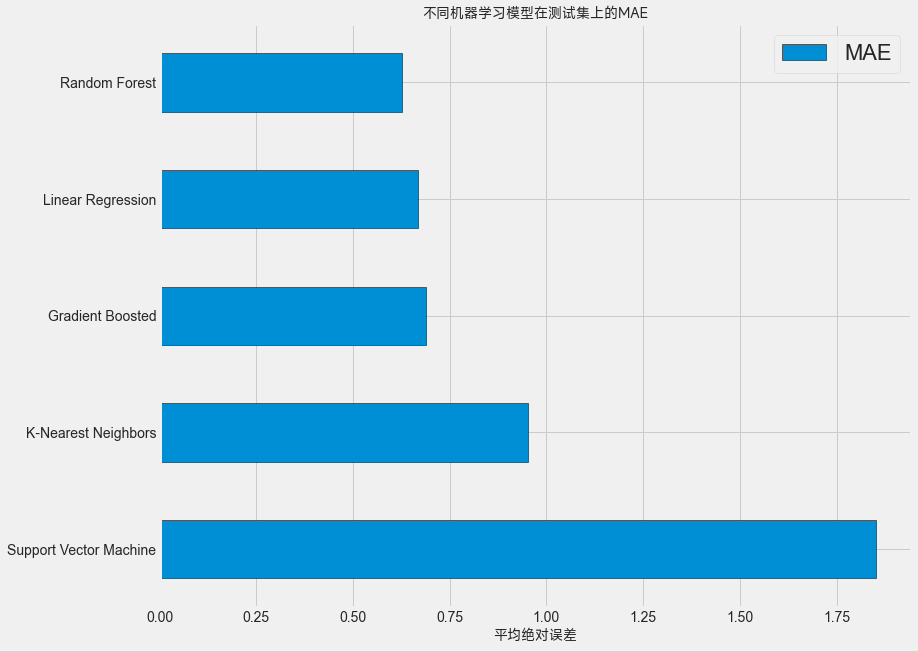

In [41]:
# 解决中文乱码问题
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r"data\Fonts\MiSans-Regular.ttf")

plt.style.use('fivethirtyeight')
figsize = (12, 6)

# 获取MAE数据
model_comparison = pd.DataFrame({'Models':['Linear Regression',
                                        'Support Vector Machine',
                                        'Random Forest',
                                        'Gradient Boosted',
                                        'K-Nearest Neighbors'],
                                  'MAE':[lr_MAE,
                                         svm_MAE,
                                         random_forest_MAE,
                                         gradient_boosted_MAE,
                                         knn_MAE]})

# 测试集上MAE的水平条形图
model_comparison.sort_values(u'MAE', ascending=False).plot(x='Models',
                                                          y='MAE',
                                                          kind=u'barh',
                                                          edgecolor=u'black')

# 绘图格式
plt.ylabel('')
plt.yticks(size=14)

plt.xlabel(u'平均绝对误差', FontProperties=myfont)
plt.xticks(size=14)

plt.title(u'不同机器学习模型在测试集上的MAE', size=30, FontProperties=myfont)

- 根据上述运行情况， 随机森林回归表现最佳，其次是线性回归。
- 而我们算出来的基线是 `MAE = 2.5926`，因此这些模型都明显**优于基线**，机器学习是**适用**的。

# 5. 超参调整 - 使用随机搜索和交叉验证进行

**交叉验证**是用于评估超参数性能的方法：我们使用K-Fold交叉验证，而不是将训练设置拆分为单独的训练和验证集，以减少我们可以使用的训练数据量。由于我们的数据量并不大，因此我们可以设置 ***10折*** 来进行验证。

下面使用sklearn里的随机搜索来完成这项工作。

In [42]:
# 梯度增强的过程中使用的树的数量
n_estimators = [10, 50, 100, 200, 300, 500, 1000]

# 树的最大深度
max_depth = [2, 3, 5, 10, 15, 20, None]

# 每片叶子的最小样本数
min_samples_leaf = [1, 2, 4]

# 拆分结点的最小样本数
min_samples_split = [2, 5, 10]

# 进行拆分时要考虑的最大特征数
max_features = ['auto', 'sqrt', 'log2', None]

# 定义超参数网络
hyperparameter_grid = {
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

我们现在定义好了6个不同的超惨进行调整，接下来我们就需要创建随即搜索对象并寻找最优的超参。

传递参数的解释：
* `estimator`: 模型（使用随机森林）
* `param_distributions`: 定义的参数的分布
* `cv` ：10折的k-fold交叉验证
* `n_iter`: 不同的参数组合的数量有
* `scoring`: 使用**MAE**评估候选参数
* `n_jobs`: -1 （全部使用）
* `verbose`: 显示信息的数量
* `return_train_score`: 启动每一个cross-validation fold 返回的分数
* `random_state`: 锁定随机种子42以确保相同的结果

In [43]:
# 建立模型
model = RandomForestRegressor(random_state=42)

# 带10折交叉验证的随机搜索
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=10, n_iter=10,
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1,
                               return_train_score=True,
                               random_state=42)

In [44]:
# 使用训练集进行随机搜索
random_cv.fit(X, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 15, 20,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         500, 1000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

然后，我们可以根据随即搜索得出的结果，来调整我们的超参数

In [45]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=50, random_state=42)

最佳梯度增强模型具有以下超参数：

- `max_depth = 20`
- `min_samples_leaf = 2`
- `min_samples_split = 10`

# 6. 在测试集上评估最佳模型
我们先使用默认模型进行训练，并评估测试集.

In [46]:
# 模型选择随机森林 - 默认模型
forest_model = RandomForestRegressor(random_state=42)

# 选择最佳模型
final_model = random_cv.best_estimator_

forest_model
final_model

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=50, random_state=42)

训练默认模型并计时

In [47]:
%%timeit -n 1 -r 10
forest_model.fit(X, y)

133 ms ± 4.19 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


训练最终模型并计时

In [48]:
%%timeit -n 1 -r 10
final_model.fit(X, y)

57.4 ms ± 2.5 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


在测试集上进行拟合测试

In [49]:
forest_model_pre = forest_model.predict(X_test)
final_model_pre = final_model.predict(X_test)

print("随机森林（默认模型）回归在测试集上的表现: MAE = %0.4f" % MAE(y_test, forest_model_pre))
print("随机森林（最终模型）回归在测试集上的表现: MAE = %0.4f" % MAE(y_test, final_model_pre))

随机森林（默认模型）回归在测试集上的表现: MAE = 0.6034
随机森林（最终模型）回归在测试集上的表现: MAE = 0.6298


最终的模型比基线模型的性能 *(MAE)* 有略微降低。因此，我们在下面使用默认模型来进行分析。

为了了解这个预测，绘制下面两个值的分布：
- 测试集上的真值
- 测试集上的预测值

Text(0.5, 1.0, '预测值和真实值的比较')

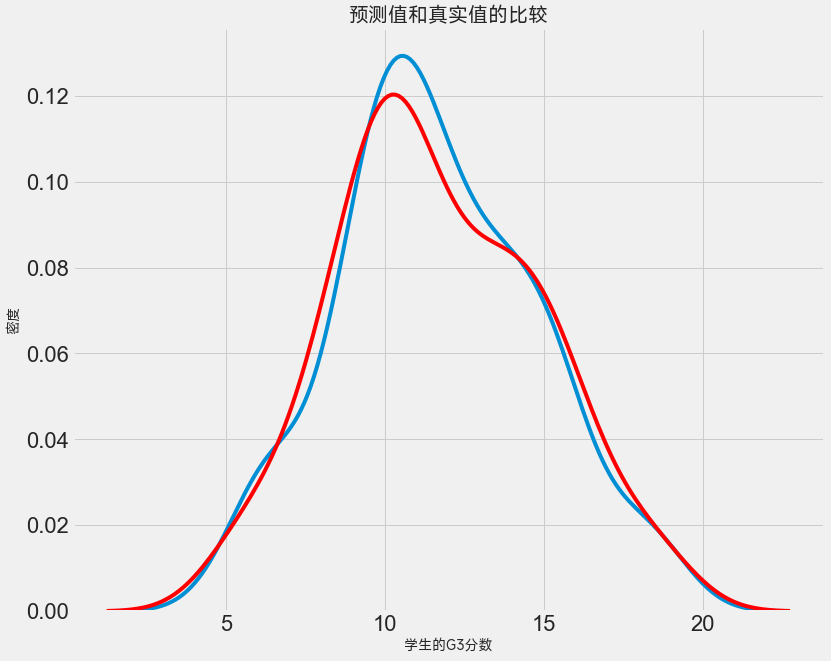

In [50]:
figsize=(8, 8)

# 最终预测的密度图和测试值
sns.kdeplot(forest_model_pre, label="预测值")
sns.kdeplot(y_test, label="真实值", color="red")

# 图标标签
plt.xlabel("学生的G3分数", FontProperties=myfont, size=14)
plt.ylabel("密度", FontProperties=myfont, size=14)
plt.title("预测值和真实值的比较", FontProperties=myfont, size=20)

上面的图表中，蓝色线代表我们的预测值，红色线代表我们的真实值。

可以看到，我们的预测值会更加靠近中位数，但是分布两者基本一致。也许这个模型有些过拟合，不太好。

下面我们来计算残差，并用直方图的形式展现出来。理论上来说，残差是符合正态分布的，表示模型的预测在高、低方向上的误差是相同的。

Text(0.5, 1.0, '残差分布直方图')

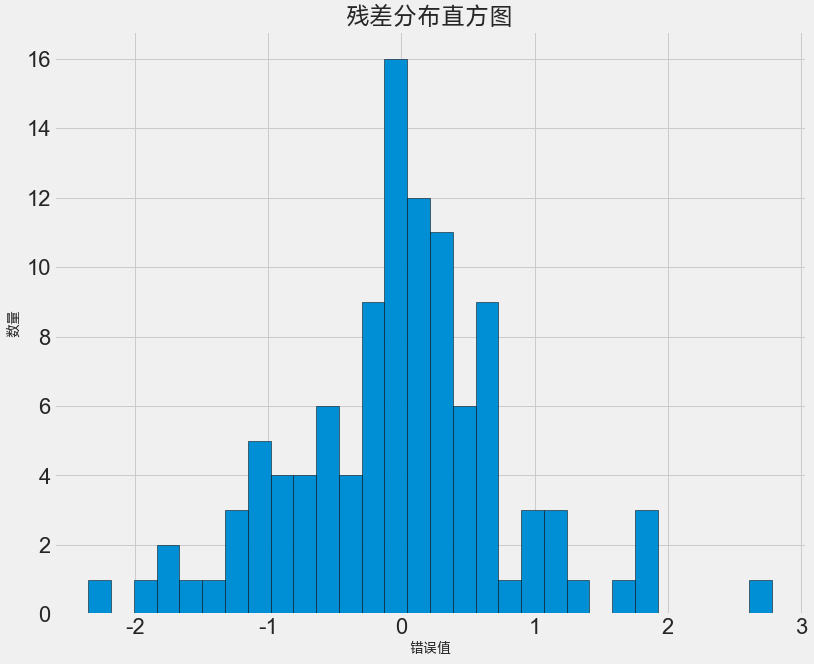

In [51]:
# 计算残差
residuals = forest_model_pre - y_test

# 绘制残差分布直方图
figsize=(8, 8)

plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('错误值', FontProperties=myfont)
plt.ylabel('数量', FontProperties=myfont)
plt.title("残差分布直方图", FontProperties=myfont, size=24)

#### 小结
在第4，5，6步我做了以下几件事情：
- 确保没有缺失值
- 评估和比较了几种机器学习方法（线性回归，支持向量机，随机森林，K-近邻回归，梯度增强回归）
- 超参数的调整
- 评估了测试集上的模型

结果表明：
1. 机器学习对我们预测学生的G3分数这一实际问题是适用的，并且我们的预测误差控制在一个相当优秀的水平。但是，我们应该对这个如此低的误差抱有疑问：**即是否会带来过拟合的问题**
2. 由于我们的数据集规模比较小，我们的学习运行时间并不是很长，但也会增大我们的模型在实际应用中不够切合实际的可能性。
3. 由于我们的数据集规模比较小，经过调整超参数后的模型误差反而比默认基准还要稍大些，其优势是模型泛化性能比较强。如果未来能够寻找更大的数据集，我们能得到更加理想的结果。


# 7. 解释模型结果
## 7.1 查找最重要的特征

在这一步，我们可以利用sklearn从训练好的树中，提取特征重要性，并对他进行可视化，以供我们查看。

In [52]:
# 提取特征重要性
important_features = pd.DataFrame({'feature': list(train_features.columns),
                                   'importance': final_model.feature_importances_})

# 显示最重要的前5名
important_features = important_features.sort_values(axis=0, by='importance', ascending=False).reset_index(drop=True)
important_features.head()

,feature,importance
0,G2,0.953560
1,G1,0.010143
2,absences,0.003031
3,Walc,0.002914
4,famrel,0.002554


我们可以看到，学生的G1,G2成绩对其G3成绩的影响是最显著的。除此之外，学生的出勤率，每周饮酒的频率和家庭关系对学生期末的G3成绩影响也有，但微乎其微。下面我们图表化来更直观的了解这组数据。

Text(0.5, 1.0, '随机森林中特征的重要性')

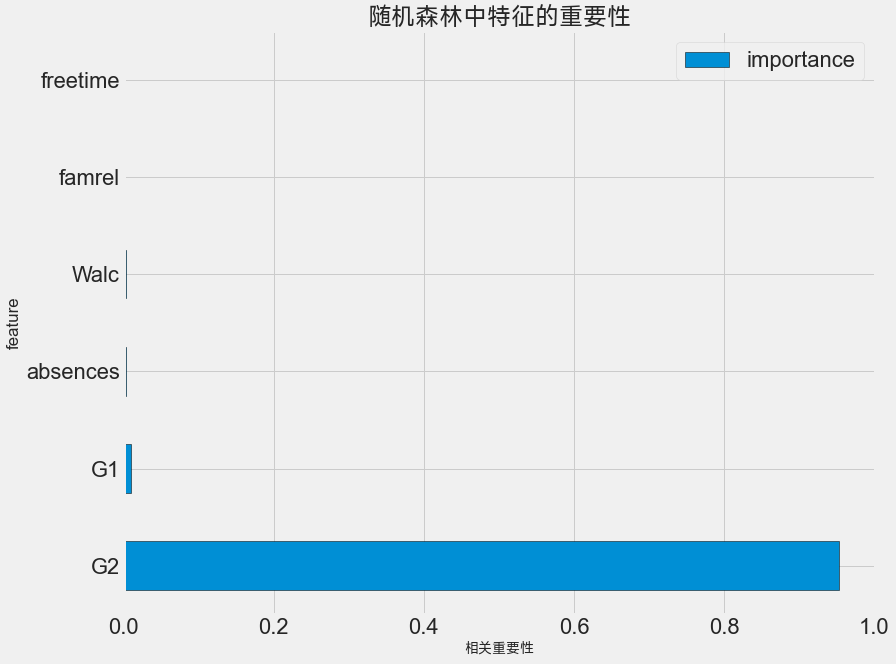

In [53]:
figsize=(12, 20)

# 绘制图像

important_features.loc[0:5, :].plot(y='importance', x='feature', edgecolor='black', kind='barh')
plt.xlabel('相关重要性', FontProperties=myfont, size=14)
plt.title("随机森林中特征的重要性", FontProperties=myfont, size=24)

# 8. 得出结论

对于我们这个项目而言，我们的结论是：

1. 使用学生的家庭背景、学业表现等数据，可以建立一个模型，用于预测该学生未来的考试表现，而且误差相对较小。
2. 除去`G1,G2`外，利用其他特征是难以预测学生的G3成绩。